# Método das diferenças finitas: Convecção

Vamos resolver a equação de convecção:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

## Setup

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

As células abaixo definem funções que criam o domínio e as condições iniciais.

In [4]:
def cria_dominios(tamanho, Nx, duração, Nt):
    """
    Cria o domínio espacial e calcula os intervalos de tempo e espaço.
    """
    x = np.linspace(0, tamanho, Nx)
    dx = x[1] - x[0]
    dt = duração/(Nt - 1)
    return x, dx, dt

In [5]:
x, dx, dt = cria_dominios(tamanho=2, Nx=51, duração=1, Nt=51)
print('dx =', dx, 'dt =', dt)

dx = 0.04 dt = 0.02


In [6]:
def cria_cond_inicial(x):
    """
    Cria um vetor de condições iniciais u0 com uma função degrau.
    """
    u0 = np.ones(x.size)
    u0[(x >= 0.2) & (x <= 0.5)] = 2
    return u0

(0, 3)

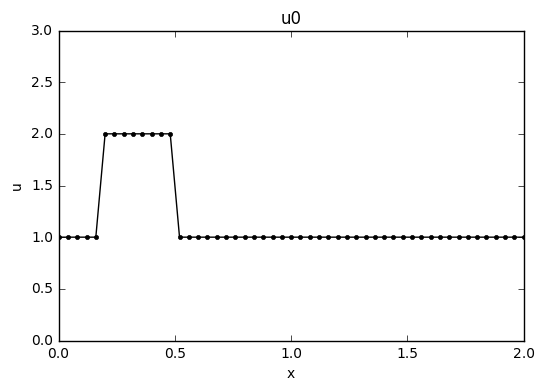

In [7]:
u0 = cria_cond_inicial(x)

plt.figure()
plt.plot(x, u0, '.-k')
plt.xlabel('x')
plt.ylabel('u')
plt.title('u0')
plt.ylim(0, 3)

## Tarefa 1

Complete a função abaixo que executa 1 único passo no tempo utilizando diferenças progressivas no tempo e regressivas no espaço.

In [8]:
def passo_no_tempo(u_passado, dx, dt, velocidade):
    """
    Executa 1 passo no tempo.
    Dado u_passado, utiliza o método das diferenças finitas 
    para calcular u_futuro com passo no tempo dt.
    
    Utiliza a condição de contorno u(x=0, t) = 1.
    """ 
    u_futuro = u_passado.copy()
    Nx = len(u_passado)
    
    u_futuro [0] = 1 #Colocamos a condição de contorno
    #utilizando as listas u_fututo e u_passado, dx e dt e velocidade para definir a nossa fórmula para o cálculo de u
    for k in range (1 , Nx):
        u_futuro[k] = u_passado[k] - velocidade* (dt/dx)* (u_passado[k] - u_passado[k-1]) 
    
    
    return u_futuro

Use as células abaixo para checar se sua função funciona.

In [9]:
u1 = passo_no_tempo(u0, dx, dt, velocidade=1)

(0, 3)

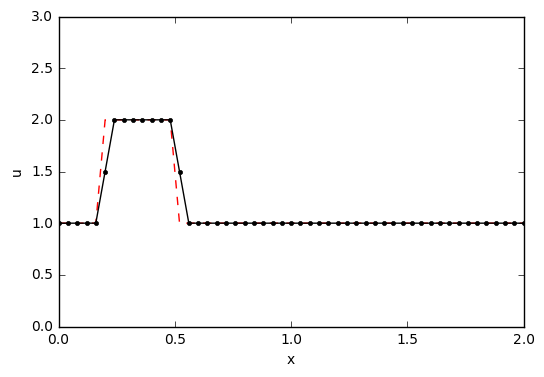

In [10]:
plt.figure()
plt.plot(x, u0, '--r')
plt.plot(x, u1, '.-k')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)

## Tarefa 2

Complete a função abaixo que executa uma simulação completa de diferenças finitas (utilizando as funções definidas acima) para uma deterimada duração.

In [72]:
def simula(tamanho, Nx, duração, Nt, velocidade):
    """
    Executa uma simulação completa da equação de convecção 
    utilizando diferenças finitas.
    
    1. Cria o domínio e a condição inicial #ok
    2. Executa Nt passos no tempo 
    3. Retorna o domínio (x), a condição inicial (u0) e 
       o resultado final da simulação (u_futuro).
    """
    # Trazendo as funções de cria_dominios e cria_cond_inicial
    
    # gerar o Domínio
    x, dx, dt = cria_dominios(tamanho, Nx, duração, Nt)
    # Criando a condição inicial
    u0 = cria_cond_inicial(x)
    
    # Fazendo o passo no tempo
    u_passado = u0
    for i in range (0, Nt) :
        u_futuro = passo_no_tempo(u_passado, dx, dt, velocidade)
        u_passado = u_futuro
        
    return x, u0, u_futuro

Utilize as células abaixo para checar o resultado da sua função.

In [73]:
x, u0, u_futuro = simula(tamanho=2, Nx=51, duração=1, Nt=51, velocidade=1)

(0, 3)

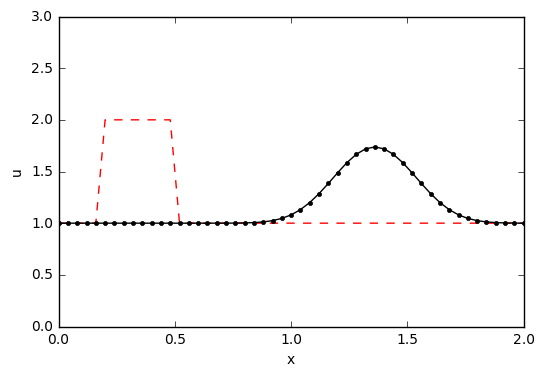

In [74]:
plt.figure()
plt.plot(x, u0, '--r')
plt.plot(x, u_futuro, '.-k')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)

### O que aconteceu com o resultado no final da simulação? Isso deveria acontecer?

## Tarefa 3

Faça uma figura com o resultado da simulação para diferentes valores `Nx` (utilize a lista abaixo). Inclua uma legenda no seu gráfico.

In [ ]:
valores_de_Nx = [51, 71, 91, 101, 111]

In [ ]:
plt.figure()


plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)

### O método é igualmente preciso para todos os valores de Nx?

## Bônus

Complete a função abaixo que executa a simulação completa mas dessa vez guarda cada passo da simulação. A função deve gerar uma lista `u` que contem o valor de $u$ de cada iteração.

Complete o código que gera um gráfico com o valor de `u` a cada 10 iterações. Ou seja, o gráfico deve conter `u[0]`, `u[10]`, `u[20]`, etc.

In [ ]:
def simula_grava(tamanho, Nx, duração, Nt, velocidade):
    """
    Executa uma simulação completa da equação de convecção 
    utilizando diferenças finitas e grava cada iteração.
    
    1. Cria o domínio e a condição inicial
    2. Executa Nt passos no tempo
    3. Retorna o domínio (x) e uma lista (u) com o resultado
       de cada passo no tempo (incluindo o u0).
    """
    
    return x, u

In [ ]:
x, u = simula_grava(tamanho=2, Nx=51, duração=1, Nt=51, velocidade=1)

In [ ]:
plt.figure()

plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0, 3)
plt.title('Simulação completa (cada 10 iterações)')

**Course website**: https://github.com/mat-esp/about

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)